# 🌸 Flowers Recognition – Image Classification Project


In this project, we built an image classification model to recognize five types of flowers: daisy, dandelion, rose, sunflower, and tulip using a Convolutional Neural Network (CNN). The dataset consisted of thousands of labeled flower images sourced from the Kaggle Flowers Recognition dataset.

We applied data augmentation to increase dataset variability and used early stopping to prevent overfitting. The CNN model was trained to classify images into 5 distinct categories based on visual patterns and features.

The goal was to explore computer vision techniques for multi-class classification using a clean and efficient deep learning pipeline.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


# Paths
data_dir = r"D:\Real ML\Level 4\Flower Recogintion\archive\flowers"
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Building Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.summary()

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
109/109 [==============================] - 73s 665ms/step - loss: 1.4745 - accuracy: 0.3899 - val_loss: 1.2877 - val_accuracy: 0.4721
Epoch 2/50
109/109 [==============================] - 45s 411ms/step - loss: 1.2384 - accuracy: 0.4929 - val_loss: 1.2041 - val_accuracy: 0.5163
Epoch 3/50
109/109 [==============================] - 53s 488ms/step - loss: 1.1678 - accuracy: 0.5473 - val_loss: 1.0676 - val_accuracy: 0.6209
Epoch 4/50
109/109 [==============================] - 54s 499ms/step - loss: 1.0968 - accuracy: 0.5785 - val_loss: 1.0116 - val_accuracy: 0.6070
Epoch 5/50
109/109 [==============================] - 46s 421ms/step - loss: 1.0149 - accuracy: 0.6092 - val_loss: 0.9307 - val_accuracy: 0.6419
Epoch 6/50
109/109 [==============================] - 52s 480ms/step - loss: 0.9723 - accuracy: 0.6300 - val_loss: 0.9319 - val_accuracy: 0.6616
Epoch 7/50
109/109 [==============================] - 50s 456ms/step - loss: 0.9481 - accuracy: 0.6384 - val_loss: 0.9261 - val_ac

In [7]:
model.save("Flower_cnn.h5")
print("✅ Model saved")

✅ Model saved


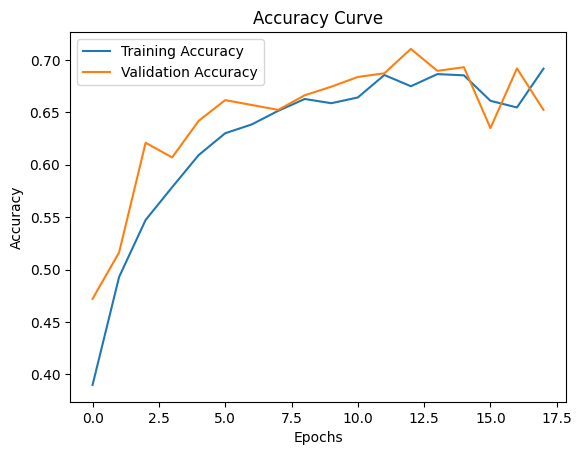

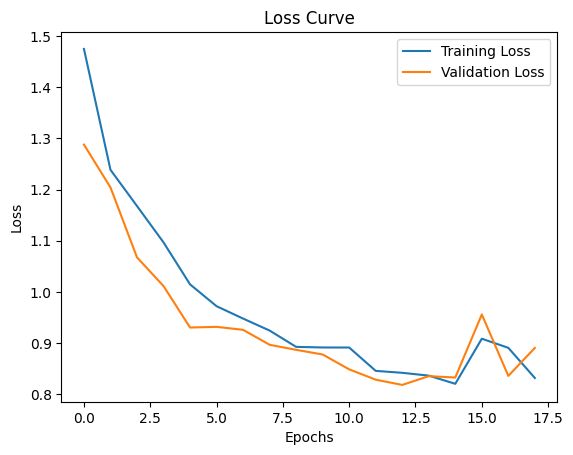

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


In [13]:
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


27/27 [==============================] - 5s 175ms/step
Classification Report:
              precision    recall  f1-score   support

       daisy       0.74      0.66      0.70       152
   dandelion       0.71      0.72      0.71       210
        rose       0.61      0.51      0.55       156
   sunflower       0.64      0.87      0.74       146
       tulip       0.70      0.65      0.68       196

    accuracy                           0.68       860
   macro avg       0.68      0.68      0.68       860
weighted avg       0.68      0.68      0.68       860

Confusion Matrix:
[[101  24  15   9   3]
 [ 19 151   0  35   5]
 [  8  16  79  10  43]
 [  6   7   2 127   4]
 [  3  15  33  17 128]]
